In [1]:
import pandas as pd  # keywords are highlighted in green, other strings in red, etc.
import numpy as np
import math

In [2]:
data= pd.read_excel('marketing_customer_analysis.xlsx')


In [3]:
#Check the data types of the columns. Get the numeric data into dataframe called numerical and 
#categorical columns in a dataframe called categoricals. (You can use np.number and np.object
#to select the numerical data types and categorical data types respectively)
numerical=data.select_dtypes(include=[np.number])
#print(numerical)
data.select_dtypes(include=[np.number])

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [4]:
categoricals=data.select_dtypes(include=[np.object])
#print(categoricals)
data.select_dtypes(include=[np.object])

C:\Users\tanya\AppData\Local\Temp\ipykernel_25348\849417655.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals=data.select_dtypes(include=[np.object])
C:\Users\tanya\AppData\Local\Temp\ipykernel_25348\849417655.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data.select_dtypes(include=[np.object])


,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [5]:

import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
#For the numerical variables, check the multicollinearity between the features. 
#Please note that we will use the column total_claim_amount later as the target variable.
data.corr()
#Let's first see the correlation between colomns. We should remove the one, that has high value.
#But looking at this table, we can see the correlation is small.


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


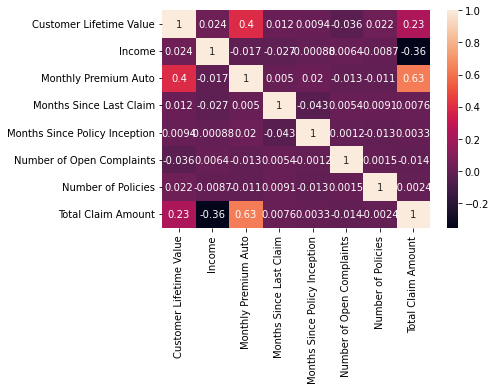

In [7]:
correlations_matrix = data.corr()
correlations_matrix
sns.heatmap(correlations_matrix, annot=True) # annot = True displays the correlation values, annot=False hides the correlation values
plt.show()

In [8]:
data['Coverage'].value_counts()

Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64

In [9]:
def cleanCoverage(x):
    x = x.lower()
    if 'basic' in x:
        return "basic"
    elif 'extended' in x:
        return "extended"
    elif 'premium' in x:
        return 'extended'
    else:
        return 'unknown'

#data['operation'] = list(map(cleanOperation, data['operation']))
data['Coverage'] = data['Coverage'].apply(cleanCoverage)
data['Coverage'].value_counts()

basic       5568
extended    3566
Name: Coverage, dtype: int64

In [10]:
data['Education'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64

In [11]:
data['EmploymentStatus'].value_counts()


Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64

In [12]:
data = data[~data['EmploymentStatus'].isin(['Medical Leave', 'Disabled', 'Retired'])]
#removing the data that has small part in the set

In [13]:
data['EmploymentStatus'].value_counts()

Employed      5698
Unemployed    2317
Name: EmploymentStatus, dtype: int64

In [14]:
def cleanEducation(x):
    x = x.lower()
    if 'bachelor' in x:
        return "bachelor"
    elif 'college' in x:
        return "college"
    elif 'high school or below' in x:
        return 'high school'
    else:
        return 'bachelor'

#data['operation'] = list(map(cleanOperation, data['operation']))
data['Education'] = data['Education'].apply(cleanEducation)
data['Education'].value_counts()
#all the Master and Doctor I put into Bachelor part. Good level of education.

bachelor       3362
college        2336
high school    2317
Name: Education, dtype: int64

In [15]:
data['Marital Status'].value_counts()
#Kept all

Married     4643
Single      2276
Divorced    1096
Name: Marital Status, dtype: int64

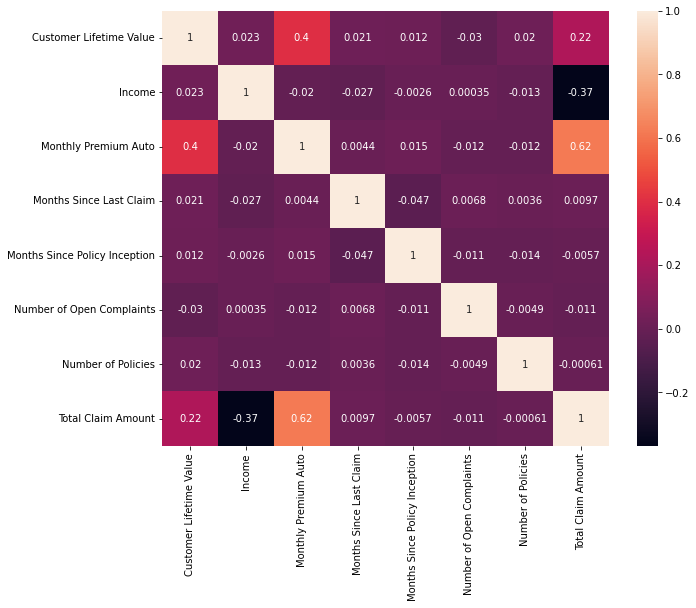

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix=data.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [17]:
print(data.columns)

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')


In [18]:
# Build X and y
y = data['Total Claim Amount']
X = data.drop(['Customer', 'Number of Open Complaints', 'Months Since Policy Inception', 
'Number of Open Complaints', 'Number of Policies', 'Response', 'State', 'Effective To Date', 
        'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size', 'Total Claim Amount'], axis=1) # all x accept the y and customer number
display(X)
#Dropped some rows regarding the vehicle, kept most of the data regarding people's life. 

,Customer Lifetime Value,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim
0,2763.519279,basic,bachelor,Employed,F,56274,Suburban,Married,69,32
1,6979.535903,extended,bachelor,Unemployed,F,0,Suburban,Single,94,13
2,12887.431650,extended,bachelor,Employed,F,48767,Suburban,Married,108,18
3,7645.861827,basic,bachelor,Unemployed,M,0,Suburban,Married,106,18
4,2813.692575,basic,bachelor,Employed,M,43836,Rural,Single,73,12
...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,basic,bachelor,Employed,M,71941,Urban,Married,73,18
9130,3096.511217,extended,college,Employed,F,21604,Suburban,Divorced,79,14
9131,8163.890428,extended,bachelor,Unemployed,M,0,Suburban,Single,85,9
9132,7524.442436,extended,college,Employed,M,21941,Suburban,Married,96,34


In [21]:
X_cat = X.select_dtypes(['object'])
X_cat

,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status
0,basic,bachelor,Employed,F,Suburban,Married
1,extended,bachelor,Unemployed,F,Suburban,Single
2,extended,bachelor,Employed,F,Suburban,Married
3,basic,bachelor,Unemployed,M,Suburban,Married
4,basic,bachelor,Employed,M,Rural,Single
...,...,...,...,...,...,...
9129,basic,bachelor,Employed,M,Urban,Married
9130,extended,college,Employed,F,Suburban,Divorced
9131,extended,bachelor,Unemployed,M,Suburban,Single
9132,extended,college,Employed,M,Suburban,Married


In [22]:
# encode categoricals
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first') # The option drop='first' drops one of the possible values.
encoder.fit(X_cat)

X_cat_encoded = encoder.transform(X_cat).toarray() # you need to make an array after onehot encoder

#pd.DataFrame(X_train_cat_encoded, columns=X_train_cat.columns)

cols = encoder.get_feature_names(input_features=X_cat.columns)
# Note: in version 1.0 and higher of sklearn this method is called 'get_feature_names_out()'
# we will reuse encoder and cols when encoding the X_test_cat #
X_encoded_df = pd.DataFrame(X_cat_encoded, columns=cols)
X_encoded_df.head()

C:\Users\tanya\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Coverage_extended,Education_college,Education_high school,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [23]:
X_num = X.select_dtypes(include = np.number)
X_num

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim
0,2763.519279,56274,69,32
1,6979.535903,0,94,13
2,12887.431650,48767,108,18
3,7645.861827,0,106,18
4,2813.692575,43836,73,12
...,...,...,...,...
9129,23405.987980,71941,73,18
9130,3096.511217,21604,79,14
9131,8163.890428,0,85,9
9132,7524.442436,21941,96,34


In [26]:
from sklearn.preprocessing import MinMaxScaler

minMaxScaler = MinMaxScaler()
minMaxScaler.fit(X_num)
X_normalized = minMaxScaler.transform(X_num)
X_num = pd.DataFrame(X_normalized, columns=X_num.columns)
X_num

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim
0,0.010629,0.562847,0.033755,0.914286
1,0.062406,0.000000,0.139241,0.371429
2,0.134960,0.487763,0.198312,0.514286
3,0.070589,0.000000,0.189873,0.514286
4,0.011245,0.438443,0.050633,0.342857
...,...,...,...,...
8010,0.264137,0.719547,0.050633,0.514286
8011,0.014719,0.216081,0.075949,0.400000
8012,0.076951,0.000000,0.101266,0.257143
8013,0.069098,0.219452,0.147679,0.971429


In [29]:
#concatenating normalized numerical X and encoded categorical
X_final = pd.concat([X_encoded_df, X_num], axis=1)
X_final


,Coverage_extended,Education_college,Education_high school,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.010629,0.562847,0.033755,0.914286
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.062406,0.000000,0.139241,0.371429
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.134960,0.487763,0.198312,0.514286
3,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.070589,0.000000,0.189873,0.514286
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.011245,0.438443,0.050633,0.342857
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8010,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.264137,0.719547,0.050633,0.514286
8011,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.014719,0.216081,0.075949,0.400000
8012,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.076951,0.000000,0.101266,0.257143
8013,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.069098,0.219452,0.147679,0.971429


In [31]:
X_final.corr()


,Coverage_extended,Education_college,Education_high school,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim
Coverage_extended,1.000000,0.001549,0.018722,0.008581,-0.008490,0.040251,-0.037092,-0.006248,0.005305,0.152401,-0.023493,0.400065,0.011848
Education_college,0.001549,1.000000,-0.408980,-0.001997,0.002086,-0.011709,0.010224,-0.004571,0.001615,-0.007601,-0.005071,-0.006732,0.011455
Education_high school,0.018722,-0.408980,1.000000,0.072362,0.015494,0.134561,-0.074717,-0.019630,0.064115,0.022781,-0.049573,0.026372,-0.006502
EmploymentStatus_Unemployed,0.008581,-0.001997,0.072362,1.000000,0.023202,0.410973,-0.244729,-0.315657,0.413232,-0.038037,-0.808533,0.009964,0.009510
Gender_M,-0.008490,0.002086,0.015494,0.023202,1.000000,0.090533,-0.054643,-0.035961,0.042791,-0.020547,-0.020014,0.005902,0.021929
Location Code_Suburban,0.040251,-0.011709,0.134561,0.410973,0.090533,1.000000,-0.588065,-0.200369,0.240116,0.004182,-0.445532,0.079554,-0.007598
Location Code_Urban,-0.037092,0.010224,-0.074717,-0.244729,-0.054643,-0.588065,1.000000,0.130525,-0.143431,0.003134,0.260491,-0.047285,-0.009913
Marital Status_Married,-0.006248,-0.004571,-0.019630,-0.315657,-0.035961,-0.200369,0.130525,1.000000,-0.738965,0.011807,0.260806,-0.009578,0.011572
Marital Status_Single,0.005305,0.001615,0.064115,0.413232,0.042791,0.240116,-0.143431,-0.738965,1.000000,-0.027707,-0.339778,0.017587,0.003293
Customer Lifetime Value,0.152401,-0.007601,0.022781,-0.038037,-0.020547,0.004182,0.003134,0.011807,-0.027707,1.000000,0.023003,0.399533,0.020863


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def train_and_validate_model(X_final, y, test_size, random_state):
    
    # Split X,y into train and test data
    X_train, X_test, y_train, y_test = train_test_split(X_final, y,
                                                        test_size=test_size,
                                                        random_state=random_state)
    print(f'X_train: {X_train.shape}')
    print(f'X_test:  {X_test.shape}')
    print(f'y_train: {y_train.shape}')
    print(f'y_test:  {y_test.shape}')


    # Apply linear regression, train/fit the model
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    
    # Predict training set
    y_pred_train = lm.predict(X_train)
    print(f"y_pred_train = {y_pred_train}")

    # R2 score for training set
    r2_train = r2_score(y_train, y_pred_train)
    print(f"r2_train     = {r2_train}")

    # Predict test set
    y_pred_test  = lm.predict(X_test)
    print(f"y_pred_test = {y_pred_test}")

    # R2 score for test set
    r2_test = r2_score(y_test, y_pred_test)
    print(f"r2_test     = {r2_test}")

    # MSE - Mean Squared Error
    mse = mean_squared_error(y_test,y_pred_test)
    print(f'MSE = {mse}')

    # RMSE - Root Mean Squared Error
    rmse = np.sqrt(mse)
    print(f'RMSE = {rmse}')

    # MAE - Mean Absolute Error
    mae = mean_absolute_error(y_test, y_pred_test)
    print(f'MAE = {mae}')
    
    return y_pred_test, y_pred_train, y_train, y_test, lm

In [39]:
y

0        384.811147
1       1131.464935
2        566.472247
3        529.881344
4        138.130879
           ...     
9129     198.234764
9130     379.200000
9131     790.784983
9132     691.200000
9133     369.600000
Name: Total Claim Amount, Length: 8015, dtype: float64

In [52]:
y_pred_test, y_pred_train, y_train, y_test, model = train_and_validate_model(X_final, y, 0.3, 25)
#R2 in my new model is 77%. R2 R-squared measures the strength of the relationship between your model 
# and the dependent variable on a convenient 0 – 100% scale. What is not bad
#Playing with different size of data set doesn't change much the results of the model. 


X_train: (5610, 13)
X_test:  (2405, 13)
y_train: (5610,)
y_test:  (2405,)
y_pred_train = [435.04454039 535.07758884  -4.67986403 ... 458.26338303  57.07875864
 286.48920196]
r2_train     = 0.7751439749807483
y_pred_test = [394.27346789 -15.71368901 210.6176226  ... 432.00765423 584.84476159
 700.33039165]
r2_test     = 0.77119609652895
MSE = 19654.190749417707
RMSE = 140.19340480000372
MAE = 96.52429389957989


In [53]:
def plot_results(y_train, y_pred_train, y_test, y_pred_test):
    '''
    Function to plot sctatterplots of real values against predicted ones. It also
    plots a histogram of the residuals
    
    Inputs:
    y_train -> np.array with the real values in the train set
    y_pred_train -> np.array/pd.Series with the predicted values in the train set
    y_test -> np.array with the real values in the test set
    y_pred_test -> np.array/pd.Series with the predicted values in the test set
    
    Output:
    Display a 4x4 grid of plots with the scatter plots and the histogram of the residuals.
    '''

    fig, ax = plt.subplots(2,2,figsize=(10,5))
    ax[0,0].scatter(x=y_train, y=y_pred_train)
    ax[0,0].set_xlabel("OVA_real")
    ax[0,0].set_ylabel("OVA_predicted")
    ax[0,0].plot(y_train,y_train, color="black")
    ax[0,0].set_title("Train set")
    ax[1,0].scatter(x=y_test, y=y_pred_test)
    ax[1,0].plot(y_test,y_test, color="black")
    ax[1,0].set_xlabel("OVA_real")
    ax[1,0].set_ylabel("OVA_predicted")
    ax[1,0].set_title("Test set")
    ax[0,1].hist(y_train-y_pred_train, bins=20)
    ax[0,1].set_xlabel("Residuals")
    ax[1,1].hist(y_test-y_pred_test, bins=20)
    ax[1,1].set_xlabel("Residuals")
    plt.tight_layout()
    plt.show()

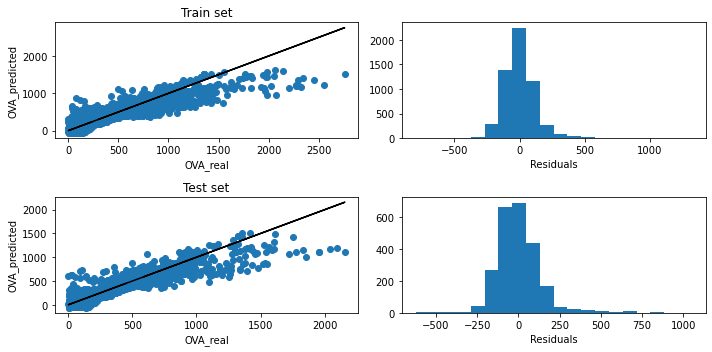

In [54]:
plot_results(y_train, y_pred_train, y_test, y_pred_test)

In [55]:
# If we keep Customer Lifetime Value, Income, Monthly Premium Auto and Months Since Last Claim
#Our numerical values. Let's see what happens. The model is worse! Categorical values are very important.
y_pred_test, y_pred_train, y_train, y_test, model = train_and_validate_model(X_num, y, 0.3, 25)

X_train: (5610, 4)
X_test:  (2405, 4)
y_train: (5610,)
y_test:  (2405,)
y_pred_train = [402.33347541 439.28642927 261.690469   ... 428.91045266 340.8885706
 240.4603389 ]
r2_train     = 0.5147053398910725
y_pred_test = [351.20667143 240.1431341  144.10051498 ... 451.85339253 512.60956988
 836.41271067]
r2_test     = 0.5040294289746355
MSE = 42603.73210924487
RMSE = 206.40671527168118
MAE = 150.94501372263582
